In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## Reading the DataSet

In [2]:
df=pd.read_csv('titanic_data - Copy.csv')

In [5]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Impact of Pclass on data

In [6]:
print(df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [7]:
# Here we took a mean, this data represents that Pclass=1 survival rate is 62.96%

### Impact of Sex on data

In [8]:
# Sex is a categorical attribute having values as male and female

In [9]:
# Impact of Sex attribute on Training Data

In [10]:
print(df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [11]:
# This shows female survival rate is more than the male counterparts

### Analyzing impact of Siblings on data

In [12]:
#SibSp is a numerical attribute represents siblings/spouse

In [13]:
print(df[["SibSp","Survived"]].groupby(['SibSp'],as_index=False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


### Analyzing Impact of Parents on data

In [14]:
# Parch is also a numerical attribute which represents the children/parents

In [15]:
print(df[["Parch","Survived"]].groupby(['Parch'],as_index=False).mean())

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


In [16]:
# Based on the impact of SibSp & Parch,lets create a new attribute called Family Size

In [17]:
df['FamilySize']=df['SibSp']+df['Parch']+1

print(df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [18]:
# Family Size seems to have a good effect on survival chance. Let's see what is the effect of being alone

In [19]:
df['IsAlone']=0
df.loc[df['FamilySize']==1,'IsAlone']=1
print(df[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


### Treating Age Variable

In [21]:
age_avg=df['Age'].mean()
age_std=df['Age'].std()
age_null_count=df['Age'].isnull().sum()
age_null_random_list=np.random.randint(age_avg-age_std,age_avg+age_std,size=age_null_count)
df['Age'][np.isnan(df['Age'])]=age_null_random_list
df['Age']=df['Age'].astype(int)

df['CategoricalAge']=pd.cut(df['Age'],5)
print(df[['CategoricalAge','Survived']].groupby(['CategoricalAge'],as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.532110
1   (16.0, 32.0]  0.364269
2   (32.0, 48.0]  0.354244
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


C:\Users\ayana\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [22]:
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,FamilySize,IsAlone,CategoricalAge
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,2,0,"(16.0, 32.0]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,2,0,"(32.0, 48.0]"
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1,"(16.0, 32.0]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,2,0,"(32.0, 48.0]"
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,1,1,"(32.0, 48.0]"
5,6,3,"Moran, Mr. James",male,34,0,0,330877,8.4583,NaN,Q,0,1,1,"(32.0, 48.0]"
6,7,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0,1,1,"(48.0, 64.0]"
7,8,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,0,5,0,"(-0.08, 16.0]"
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,1,3,0,"(16.0, 32.0]"
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,1,2,0,"(-0.08, 16.0]"


### Converting Sex into numerical attributes

In [23]:
df['Sex']=df['Sex'].fillna(0)
df['Sex']=df['Sex'].map({'female':0,'male':1}).astype(int)

### Mapping Embarked

In [25]:
# Embarked attribute is having missing values, best way to fill this would be by most occured value. In this dataset the most
# occured value for embarked attribute is 'S'

In [26]:
# Fill missing embarked value with mode
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [27]:
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

### Mapping Fare

In [28]:
df.loc[df['Fare']<=7.91,'Fare']=0
df.loc[(df['Fare']>7.91)&(df['Fare']<=14.454),'Fare']=1
df.loc[(df['Fare']>14.454)&(df['Fare']<=31),'Fare']=2
df.loc[df['Fare']>31,'Fare']=3
df['Fare']=df['Fare'].astype(float)

### Mapping Age

In [33]:
df.loc[df['Age']<=16,'Age']=0
df.loc[(df['Age']>16)&(df['Age']<=32),'Age']=1
df.loc[(df['Age']>32)&(df['Age']<=48),'Age']=2
df.loc[(df['Age']>48)&(df['Age']<=64),'Age']=3
df.loc[(df['Age']>64),'Age']=4

In [30]:
def read_dataset():
    df=pd.read_csv('titanic_data - Copy.csv')
    X=df[df.columns[0:11]].values
    y=df[df.columns[11]]
    
    #Encode the dependent variable
    encoder=LabelEncoder()
    encoder.fit(y)
    y=encoder.transform(y)
    Y=one_hot_encode(y)
    print(X.shape)
    return(X,Y)

In [31]:
def one_hot_encode(labels):
    n_labels=len(labels)
    n_unique_labels=len(np.unique(labels))
    one_hot_encode=np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels]=1
    return one_hot_encode

In [34]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,FamilySize,IsAlone,CategoricalAge
0,1,3,"Braund, Mr. Owen Harris",1,0,1,0,A/5 21171,0.0,NaN,0,0,2,0,"(16.0, 32.0]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,1,0,PC 17599,3.0,C85,1,1,2,0,"(32.0, 48.0]"
2,3,3,"Heikkinen, Miss. Laina",0,0,0,0,STON/O2. 3101282,1.0,NaN,0,1,1,1,"(16.0, 32.0]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0,1,0,113803,3.0,C123,0,1,2,0,"(32.0, 48.0]"
4,5,3,"Allen, Mr. William Henry",1,0,0,0,373450,1.0,NaN,0,0,1,1,"(32.0, 48.0]"


In [41]:
to_remove =['CategoricalAge','Ticket','Cabin','Name']
df1=df[df.columns.difference(to_remove)]

In [45]:
print(df1[df1['Age']==0])

     Age  Embarked  FamilySize  Fare  IsAlone  Parch  PassengerId  Pclass  \
0      0         0           2   0.0        0      0            1       3   
1      0         1           2   3.0        0      0            2       1   
2      0         0           1   1.0        1      0            3       3   
3      0         0           2   3.0        0      0            4       1   
4      0         0           1   1.0        1      0            5       3   
5      0         2           1   1.0        1      0            6       3   
6      0         0           1   3.0        1      0            7       1   
7      0         0           5   2.0        0      1            8       3   
8      0         0           3   1.0        0      2            9       3   
9      0         1           2   2.0        0      0           10       2   
10     0         0           3   2.0        0      1           11       3   
11     0         0           1   2.0        1      0           12       1   

In [46]:
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,IsAlone
0,1,3,1,0,1,0,0.0,0,0,2,0
1,2,1,0,0,1,0,3.0,1,1,2,0
2,3,3,0,0,0,0,1.0,0,1,1,1
3,4,1,0,0,1,0,3.0,0,1,2,0
4,5,3,1,0,0,0,1.0,0,0,1,1
5,6,3,1,0,0,0,1.0,2,0,1,1
6,7,1,1,0,0,0,3.0,0,0,1,1
7,8,3,1,0,3,1,2.0,0,0,5,0
8,9,3,0,0,0,2,1.0,0,1,3,0
9,10,2,0,0,1,0,2.0,1,1,2,0


In [47]:
df2=pd.read_csv('titanic_data - Copy.csv')

In [48]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [50]:
print(df2[['Age','Survived']].groupby(['Age'],as_index=False).mean())

      Age  Survived
0    0.42  1.000000
1    0.67  1.000000
2    0.75  1.000000
3    0.83  1.000000
4    0.92  1.000000
5    1.00  0.714286
6    2.00  0.300000
7    3.00  0.833333
8    4.00  0.700000
9    5.00  1.000000
10   6.00  0.666667
11   7.00  0.333333
12   8.00  0.500000
13   9.00  0.250000
14  10.00  0.000000
15  11.00  0.250000
16  12.00  1.000000
17  13.00  1.000000
18  14.00  0.500000
19  14.50  0.000000
20  15.00  0.800000
21  16.00  0.352941
22  17.00  0.461538
23  18.00  0.346154
24  19.00  0.360000
25  20.00  0.200000
26  20.50  0.000000
27  21.00  0.208333
28  22.00  0.407407
29  23.00  0.333333
..    ...       ...
58  44.00  0.333333
59  45.00  0.416667
60  45.50  0.000000
61  46.00  0.000000
62  47.00  0.111111
63  48.00  0.666667
64  49.00  0.666667
65  50.00  0.500000
66  51.00  0.285714
67  52.00  0.500000
68  53.00  1.000000
69  54.00  0.375000
70  55.00  0.500000
71  55.50  0.000000
72  56.00  0.500000
73  57.00  0.000000
74  58.00  0.600000
75  59.00  0.000000


In [51]:
age_avg=df2['Age'].mean()
age_std=df2['Age'].std()
age_null_count=df2['Age'].isnull().sum()

In [52]:
age_null_random_list=np.random.randint(age_avg-age_std,age_avg+age_std,size=age_null_count)

In [53]:
df2['Age'][np.isnan(df2['Age'])]=age_null_random_list
df2['Age']=df2['Age'].astype(int)

df2['CategoricalAge']=pd.cut(df2['Age'],5)

C:\Users\ayana\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
print(df2[['CategoricalAge','Survived']].groupby(['CategoricalAge'],as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.504132
1   (16.0, 32.0]  0.354545
2   (32.0, 48.0]  0.376000
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [55]:
df2.loc[df2['Age']<=16,'Age']=0
df2.loc[(df2['Age']>16)&(df2['Age']<=32),'Age']=1
df2.loc[(df2['Age']>32)&(df2['Age']<=48),'Age']=2
df2.loc[(df2['Age']>48)&(df2['Age']<=64),'Age']=3
df2.loc[(df2['Age']>64),'Age']=4

In [56]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,CategoricalAge
0,1,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S,0,"(16.0, 32.0]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C,1,"(32.0, 48.0]"
2,3,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(16.0, 32.0]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S,1,"(32.0, 48.0]"
4,5,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S,0,"(32.0, 48.0]"
5,6,3,"Moran, Mr. James",male,2,0,0,330877,8.4583,NaN,Q,0,"(32.0, 48.0]"
6,7,1,"McCarthy, Mr. Timothy J",male,3,0,0,17463,51.8625,E46,S,0,"(48.0, 64.0]"
7,8,3,"Palsson, Master. Gosta Leonard",male,0,3,1,349909,21.0750,NaN,S,0,"(-0.08, 16.0]"
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,1,0,2,347742,11.1333,NaN,S,1,"(16.0, 32.0]"
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0,1,0,237736,30.0708,NaN,C,1,"(-0.08, 16.0]"


In [57]:
df1['Age']=df2['Age']

In [58]:
df1

,Age,Embarked,FamilySize,Fare,IsAlone,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,1,0,2,0.0,0,0,1,3,1,1,0
1,2,1,2,3.0,0,0,2,1,0,1,1
2,1,0,1,1.0,1,0,3,3,0,0,1
3,2,0,2,3.0,0,0,4,1,0,1,1
4,2,0,1,1.0,1,0,5,3,1,0,0
5,2,2,1,1.0,1,0,6,3,1,0,0
6,3,0,1,3.0,1,0,7,1,1,0,0
7,0,0,5,2.0,0,1,8,3,1,3,0
8,1,0,3,1.0,0,2,9,3,0,0,1
9,0,1,2,2.0,0,0,10,2,0,1,1


In [59]:
df1.head()

,Age,Embarked,FamilySize,Fare,IsAlone,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,1,0,2,0.0,0,0,1,3,1,1,0
1,2,1,2,3.0,0,0,2,1,0,1,1
2,1,0,1,1.0,1,0,3,3,0,0,1
3,2,0,2,3.0,0,0,4,1,0,1,1
4,2,0,1,1.0,1,0,5,3,1,0,0


In [67]:
print(df1['Age'].unique())

[1 2 3 0 4]


In [148]:
to_remove =['Parch','SibSp','Cabin','Name','PassengerId']
df1=df1[df1.columns.difference(to_remove)]

In [149]:
df1.head(20)

,Age,Embarked,FamilySize,Fare,IsAlone,Pclass,Sex,Survived
0,1,0,2,0.0,0,3,1,0
1,2,1,2,3.0,0,1,0,1
2,1,0,1,1.0,1,3,0,1
3,2,0,2,3.0,0,1,0,1
4,2,0,1,1.0,1,3,1,0
5,2,2,1,1.0,1,3,1,0
6,3,0,1,3.0,1,1,1,0
7,0,0,5,2.0,0,3,1,0
8,1,0,3,1.0,0,3,0,1
9,0,1,2,2.0,0,2,0,1


In [150]:
X=df1[df1.columns[0:7]].values
y=df1[df1.columns[7]]

In [151]:
print(len(y))

891


# Define the encoder function

In [114]:
def one_hot_encode(labels):
    n_labels=len(labels)
    n_unique_labels=len(np.unique(labels))
    one_hot_encode=np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels]=1
    return one_hot_encode

In [152]:
#Encode the dependent variable
encoder=LabelEncoder()
encoder.fit(y)
y=encoder.transform(y)
y=one_hot_encode(y)

## Shuffle the data set and mix up the rows

In [153]:
X,y=shuffle(X,y,random_state=1)

### Split the dataset into train and test set

In [154]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.20,random_state=415)

In [79]:
#Inspect the shape of training and testing

In [155]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(712, 7)
(712, 2)
(179, 7)


## Define the important parameters and variables to work with the tensors

In [156]:
learning_rate=0.3
training_epochs=1000
cost_history=[]
n_dim=X.shape[1]
print("n_dim",n_dim)
n_class=2

n_dim 7


In [83]:
model_path="C:\\Users\\ayana\\Documents\\ML\\Machine Learning With Python\\model.h5"

In [157]:
n_hidden_1=60
n_hidden_2=60
n_hidden_3=60
n_hidden_4=60

In [158]:
x=tf.placeholder(tf.float32,[None,n_dim])
W=tf.Variable(tf.zeros([n_dim,n_class]))
b=tf.Variable(tf.zeros([n_class]))
y_=tf.placeholder(tf.float32,[None,n_class])

In [159]:
def multilayer_perceptron(x,weights,biases):
    # Hidden Layer with RELU activation
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1=tf.nn.sigmoid(layer_1)
    
    # Hidden layer with sigmoid activation
    
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2=tf.nn.sigmoid(layer_2)
    
    layer_3=tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3=tf.nn.sigmoid(layer_3)
    
    layer_4=tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    layer_4=tf.nn.sigmoid(layer_3)
    
    #Output layer with Linear activation
    
    out_layer=tf.matmul(layer_4,weights['out'])+biases['out']
    return out_layer

## Define the weights and biases for each layer of the model

In [160]:
weights={
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}
biases={
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_class]))
}

## Initialize all the variables

In [161]:
init=tf.global_variables_initializer()
saver=tf.train.Saver()

## Call the defined model

In [162]:
Y=multilayer_perceptron(x,weights,biases)

## Define the cost function and optimizer

In [163]:
cost_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Y,labels=y_))

In [164]:
training_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [165]:
sess=tf.Session()

In [166]:
sess.run(init)

## Calculate the cost and accuracy for each epoch

In [167]:
mse_history=[]
accuracy_history=[]

for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost=sess.run(cost_function,feed_dict={x:train_x,y_:train_y})
    cost_history=np.append(cost_history,cost)
    correct_prediction=tf.equal(tf.argmax(Y,1),tf.argmax(y_,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    #print accuracy
    
    pred_y=sess.run(Y,feed_dict={x:test_x})
    mse=tf.reduce_mean(tf.square(pred_y-test_y))
    
    mse_=sess.run(mse)
    mse_history.append(mse_)
    accuracy=(sess.run(accuracy,feed_dict={x:train_x,y_:train_y}))
    accuracy_history.append(accuracy)
    
    print('epoch:',epoch,'-','cost:',cost,"-MSE:",mse_,"-Train Accuracy:",accuracy)
    
save_path=saver.save(sess,model_path)
print("Model saved in file: %s" % save_path)

epoch: 0 - cost: 1.54787 -MSE: 30.3119400436 -Train Accuracy: 0.38764
epoch: 1 - cost: 2.28159 -MSE: 36.3646603355 -Train Accuracy: 0.61236
epoch: 2 - cost: 0.704318 -MSE: 28.4158180452 -Train Accuracy: 0.429775
epoch: 3 - cost: 0.936873 -MSE: 29.2224554345 -Train Accuracy: 0.61236
epoch: 4 - cost: 1.48287 -MSE: 29.9178861975 -Train Accuracy: 0.38764
epoch: 5 - cost: 2.2546 -MSE: 36.0181233185 -Train Accuracy: 0.61236
epoch: 6 - cost: 0.702346 -MSE: 28.1997043676 -Train Accuracy: 0.428371
epoch: 7 - cost: 0.95684 -MSE: 29.1076577673 -Train Accuracy: 0.61236
epoch: 8 - cost: 1.48933 -MSE: 29.7352544596 -Train Accuracy: 0.38764
epoch: 9 - cost: 2.2438 -MSE: 35.8105410303 -Train Accuracy: 0.61236
epoch: 10 - cost: 0.696051 -MSE: 28.0071307588 -Train Accuracy: 0.505618
epoch: 11 - cost: 0.947865 -MSE: 28.9213655372 -Train Accuracy: 0.61236
epoch: 12 - cost: 1.47566 -MSE: 29.533270872 -Train Accuracy: 0.38764
epoch: 13 - cost: 2.22989 -MSE: 35.6028100151 -Train Accuracy: 0.61236
epoch: 14 -

epoch: 115 - cost: 1.02672 -MSE: 30.1149521238 -Train Accuracy: 0.61236
epoch: 116 - cost: 1.23749 -MSE: 29.4365122219 -Train Accuracy: 0.38764
epoch: 117 - cost: 1.89463 -MSE: 34.9364091564 -Train Accuracy: 0.61236
epoch: 118 - cost: 0.672594 -MSE: 28.3190755997 -Train Accuracy: 0.668539
epoch: 119 - cost: 1.03737 -MSE: 30.2310257811 -Train Accuracy: 0.61236
epoch: 120 - cost: 1.22382 -MSE: 29.4573779192 -Train Accuracy: 0.38764
epoch: 121 - cost: 1.87509 -MSE: 34.8935780131 -Train Accuracy: 0.61236
epoch: 122 - cost: 0.677104 -MSE: 28.3715775806 -Train Accuracy: 0.668539
epoch: 123 - cost: 1.049 -MSE: 30.3510270886 -Train Accuracy: 0.61236
epoch: 124 - cost: 1.2094 -MSE: 29.4753666236 -Train Accuracy: 0.38764
epoch: 125 - cost: 1.85439 -MSE: 34.8419779887 -Train Accuracy: 0.61236
epoch: 126 - cost: 0.682399 -MSE: 28.424045058 -Train Accuracy: 0.667135
epoch: 127 - cost: 1.06167 -MSE: 30.4753453211 -Train Accuracy: 0.61236
epoch: 128 - cost: 1.19417 -MSE: 29.4902251293 -Train Accuracy

epoch: 228 - cost: 0.868883 -MSE: 29.3920993463 -Train Accuracy: 0.629214
epoch: 229 - cost: 1.13758 -MSE: 32.0032103295 -Train Accuracy: 0.61236
epoch: 230 - cost: 0.867241 -MSE: 29.3998508802 -Train Accuracy: 0.629214
epoch: 231 - cost: 1.12999 -MSE: 31.9846827493 -Train Accuracy: 0.61236
epoch: 232 - cost: 0.865544 -MSE: 29.4074240154 -Train Accuracy: 0.629214
epoch: 233 - cost: 1.12247 -MSE: 31.9664679896 -Train Accuracy: 0.61236
epoch: 234 - cost: 0.863793 -MSE: 29.4148034593 -Train Accuracy: 0.629214
epoch: 235 - cost: 1.115 -MSE: 31.9485381804 -Train Accuracy: 0.61236
epoch: 236 - cost: 0.861985 -MSE: 29.4219704701 -Train Accuracy: 0.629214
epoch: 237 - cost: 1.10759 -MSE: 31.9308403123 -Train Accuracy: 0.61236
epoch: 238 - cost: 0.860123 -MSE: 29.428918967 -Train Accuracy: 0.629214
epoch: 239 - cost: 1.10023 -MSE: 31.9133664597 -Train Accuracy: 0.61236
epoch: 240 - cost: 0.858203 -MSE: 29.4356287859 -Train Accuracy: 0.629214
epoch: 241 - cost: 1.09292 -MSE: 31.8960685673 -Train

epoch: 340 - cost: 0.699768 -MSE: 29.564210842 -Train Accuracy: 0.679775
epoch: 341 - cost: 0.770383 -MSE: 31.1105826609 -Train Accuracy: 0.70927
epoch: 342 - cost: 0.696178 -MSE: 29.5668029036 -Train Accuracy: 0.679775
epoch: 343 - cost: 0.765291 -MSE: 31.098555161 -Train Accuracy: 0.70927
epoch: 344 - cost: 0.692623 -MSE: 29.5694893645 -Train Accuracy: 0.679775
epoch: 345 - cost: 0.760284 -MSE: 31.0868009989 -Train Accuracy: 0.710674
epoch: 346 - cost: 0.689104 -MSE: 29.5722801999 -Train Accuracy: 0.679775
epoch: 347 - cost: 0.755364 -MSE: 31.0753244687 -Train Accuracy: 0.712079
epoch: 348 - cost: 0.685624 -MSE: 29.5751624551 -Train Accuracy: 0.68118
epoch: 349 - cost: 0.750531 -MSE: 31.0641312981 -Train Accuracy: 0.712079
epoch: 350 - cost: 0.682185 -MSE: 29.5781383969 -Train Accuracy: 0.68118
epoch: 351 - cost: 0.745786 -MSE: 31.0532169273 -Train Accuracy: 0.716292
epoch: 352 - cost: 0.678788 -MSE: 29.5812136699 -Train Accuracy: 0.685393
epoch: 353 - cost: 0.74113 -MSE: 31.04258711

epoch: 452 - cost: 0.569082 -MSE: 29.8224150282 -Train Accuracy: 0.73736
epoch: 453 - cost: 0.60165 -MSE: 30.8389119389 -Train Accuracy: 0.758427
epoch: 454 - cost: 0.567836 -MSE: 29.8281480476 -Train Accuracy: 0.73736
epoch: 455 - cost: 0.600146 -MSE: 30.8396080339 -Train Accuracy: 0.758427
epoch: 456 - cost: 0.566612 -MSE: 29.8338819706 -Train Accuracy: 0.73736
epoch: 457 - cost: 0.598672 -MSE: 30.8404117433 -Train Accuracy: 0.758427
epoch: 458 - cost: 0.565412 -MSE: 29.8396170913 -Train Accuracy: 0.73736
epoch: 459 - cost: 0.597227 -MSE: 30.8413156359 -Train Accuracy: 0.758427
epoch: 460 - cost: 0.564235 -MSE: 29.8453483921 -Train Accuracy: 0.73736
epoch: 461 - cost: 0.59581 -MSE: 30.8423210319 -Train Accuracy: 0.758427
epoch: 462 - cost: 0.563079 -MSE: 29.8510787464 -Train Accuracy: 0.73736
epoch: 463 - cost: 0.59442 -MSE: 30.8434227863 -Train Accuracy: 0.758427
epoch: 464 - cost: 0.561945 -MSE: 29.8567992348 -Train Accuracy: 0.738764
epoch: 465 - cost: 0.593057 -MSE: 30.8446105376

epoch: 564 - cost: 0.522627 -MSE: 30.1043391714 -Train Accuracy: 0.757023
epoch: 565 - cost: 0.546397 -MSE: 30.9459311 -Train Accuracy: 0.783708
epoch: 566 - cost: 0.522046 -MSE: 30.1080825904 -Train Accuracy: 0.757023
epoch: 567 - cost: 0.545715 -MSE: 30.9476566752 -Train Accuracy: 0.783708
epoch: 568 - cost: 0.52147 -MSE: 30.1117714152 -Train Accuracy: 0.757023
epoch: 569 - cost: 0.545038 -MSE: 30.9493392468 -Train Accuracy: 0.783708
epoch: 570 - cost: 0.520898 -MSE: 30.1154041836 -Train Accuracy: 0.759831
epoch: 571 - cost: 0.544367 -MSE: 30.9509827607 -Train Accuracy: 0.783708
epoch: 572 - cost: 0.520329 -MSE: 30.11898083 -Train Accuracy: 0.759831
epoch: 573 - cost: 0.5437 -MSE: 30.952580172 -Train Accuracy: 0.783708
epoch: 574 - cost: 0.519765 -MSE: 30.1224997903 -Train Accuracy: 0.759831
epoch: 575 - cost: 0.543038 -MSE: 30.9541356464 -Train Accuracy: 0.783708
epoch: 576 - cost: 0.519205 -MSE: 30.1259666747 -Train Accuracy: 0.759831
epoch: 577 - cost: 0.542381 -MSE: 30.9556494588

epoch: 676 - cost: 0.494565 -MSE: 30.2294542932 -Train Accuracy: 0.772472
epoch: 677 - cost: 0.513504 -MSE: 30.9681996542 -Train Accuracy: 0.801966
epoch: 678 - cost: 0.494125 -MSE: 30.2301695372 -Train Accuracy: 0.772472
epoch: 679 - cost: 0.512987 -MSE: 30.9671490345 -Train Accuracy: 0.801966
epoch: 680 - cost: 0.493687 -MSE: 30.230829037 -Train Accuracy: 0.772472
epoch: 681 - cost: 0.512472 -MSE: 30.9660475172 -Train Accuracy: 0.801966
epoch: 682 - cost: 0.49325 -MSE: 30.23144246 -Train Accuracy: 0.772472
epoch: 683 - cost: 0.511959 -MSE: 30.9648954876 -Train Accuracy: 0.801966
epoch: 684 - cost: 0.492815 -MSE: 30.2320012808 -Train Accuracy: 0.772472
epoch: 685 - cost: 0.511449 -MSE: 30.9636941786 -Train Accuracy: 0.801966
epoch: 686 - cost: 0.492381 -MSE: 30.2325069664 -Train Accuracy: 0.772472
epoch: 687 - cost: 0.51094 -MSE: 30.9624407976 -Train Accuracy: 0.801966
epoch: 688 - cost: 0.49195 -MSE: 30.232963508 -Train Accuracy: 0.776685
epoch: 689 - cost: 0.510434 -MSE: 30.96114045

epoch: 788 - cost: 0.472506 -MSE: 30.1980855744 -Train Accuracy: 0.789326
epoch: 789 - cost: 0.487585 -MSE: 30.8415757668 -Train Accuracy: 0.810393
epoch: 790 - cost: 0.472158 -MSE: 30.1964441685 -Train Accuracy: 0.789326
epoch: 791 - cost: 0.487176 -MSE: 30.8383304998 -Train Accuracy: 0.810393
epoch: 792 - cost: 0.471811 -MSE: 30.1947792829 -Train Accuracy: 0.789326
epoch: 793 - cost: 0.486768 -MSE: 30.8350675824 -Train Accuracy: 0.810393
epoch: 794 - cost: 0.471465 -MSE: 30.1930890564 -Train Accuracy: 0.792135
epoch: 795 - cost: 0.486363 -MSE: 30.8317741091 -Train Accuracy: 0.810393
epoch: 796 - cost: 0.471122 -MSE: 30.1913732444 -Train Accuracy: 0.792135
epoch: 797 - cost: 0.485959 -MSE: 30.8284668335 -Train Accuracy: 0.810393
epoch: 798 - cost: 0.47078 -MSE: 30.1896318417 -Train Accuracy: 0.792135
epoch: 799 - cost: 0.485557 -MSE: 30.8251346569 -Train Accuracy: 0.810393
epoch: 800 - cost: 0.470439 -MSE: 30.187865571 -Train Accuracy: 0.792135
epoch: 801 - cost: 0.485156 -MSE: 30.821

epoch: 900 - cost: 0.455143 -MSE: 30.0815419682 -Train Accuracy: 0.794944
epoch: 901 - cost: 0.467208 -MSE: 30.641590811 -Train Accuracy: 0.813202
epoch: 902 - cost: 0.454869 -MSE: 30.0792947386 -Train Accuracy: 0.794944
epoch: 903 - cost: 0.466886 -MSE: 30.6379695947 -Train Accuracy: 0.813202
epoch: 904 - cost: 0.454596 -MSE: 30.0770472548 -Train Accuracy: 0.794944
epoch: 905 - cost: 0.466566 -MSE: 30.6343535031 -Train Accuracy: 0.813202
epoch: 906 - cost: 0.454324 -MSE: 30.0748051707 -Train Accuracy: 0.794944
epoch: 907 - cost: 0.466247 -MSE: 30.6307458147 -Train Accuracy: 0.813202
epoch: 908 - cost: 0.454053 -MSE: 30.0725729116 -Train Accuracy: 0.794944
epoch: 909 - cost: 0.46593 -MSE: 30.6271491445 -Train Accuracy: 0.813202
epoch: 910 - cost: 0.453783 -MSE: 30.0703402437 -Train Accuracy: 0.794944
epoch: 911 - cost: 0.465614 -MSE: 30.6235611944 -Train Accuracy: 0.813202
epoch: 912 - cost: 0.453515 -MSE: 30.0681134343 -Train Accuracy: 0.794944
epoch: 913 - cost: 0.465299 -MSE: 30.619

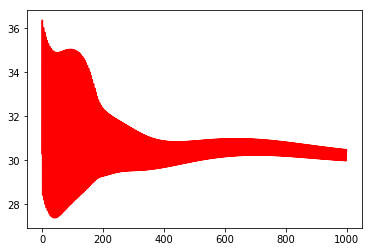

In [169]:
#Plot mse and accuracy graph
plt.plot(mse_history,'r')
plt.show()

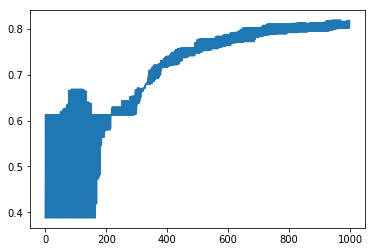

In [170]:
plt.plot(accuracy_history)
plt.show()

## print the final accuracy

In [171]:
correct_prediction=tf.equal(tf.argmax(Y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Test Accuracy:",(sess.run(accuracy,feed_dict={x:test_x,y_:test_y})))

Test Accuracy: 0.782123


## print the final mean square error

In [172]:
pred_y=sess.run(Y,feed_dict={x:test_x})
mse=tf.reduce_mean(tf.square(pred_y-test_y))
print("MSE:%.4f" % sess.run(mse))

MSE:30.4786


In [173]:
prediction=tf.argmax(Y,1)
correct_prediction=tf.equal(prediction,tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

## print accuracy run

In [188]:
print('******************************')
print("0 stands for Not Survived  and 1 stands for Survived")
print('******************************')

for i in range(393,401):
    
    prediction_run = sess.run(prediction, feed_dict={x:X[i].reshape(1,7)})
    accuracy_run = sess.run(accuracy, feed_dict={x:X[i].reshape(1,7), y_:y[i].reshape(1,2)})
    print(i,"Original Class: ", int(sess.run(y_[i][1],feed_dict={y_:y})), " Predicted Values: ", prediction_run[0] )
    print("Accuracy: ",str(accuracy_run*100)+"%")

******************************
0 stands for Not Survived  and 1 stands for Survived
******************************
393 Original Class:  0  Predicted Values:  1
Accuracy:  0.0%
394 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
395 Original Class:  1  Predicted Values:  1
Accuracy:  100.0%
396 Original Class:  1  Predicted Values:  1
Accuracy:  100.0%
397 Original Class:  1  Predicted Values:  1
Accuracy:  100.0%
398 Original Class:  1  Predicted Values:  0
Accuracy:  0.0%
399 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
400 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
